# Preparación de datos

In [1]:
import Datos

dataset_heart = Datos.Datos('Datasets/heart.csv')
dataset_wdbc = Datos.Datos('Datasets/wdbc.csv')
dataset_iris = Datos.Datos('Datasets/iris.csv')

dataset_heart_norm = Datos.Datos('Datasets/heart.csv')
dataset_wdbc_norm = Datos.Datos('Datasets/wdbc.csv')
dataset_iris_norm = Datos.Datos('Datasets/iris.csv')

heart_data = dataset_heart.datos
wdbc_data = dataset_wdbc.datos
iris_data = dataset_iris.datos

dataset_heart_norm.datos, _, _ = Datos.estandarizarDatos(dataset_heart_norm.datos, dataset_heart_norm.nominalAtributos, dataset_heart_norm.diccionarios)
dataset_wdbc_norm.datos, _, _ = Datos.estandarizarDatos(dataset_wdbc_norm.datos, dataset_wdbc_norm.nominalAtributos, dataset_wdbc_norm.diccionarios)
dataset_iris_norm.datos, _, _ = Datos.estandarizarDatos(dataset_iris_norm.datos, dataset_iris_norm.nominalAtributos, dataset_iris_norm.diccionarios)

heart_data_norm = dataset_heart_norm.datos
wdbc_data_norm = dataset_wdbc_norm.datos
iris_data_norm = dataset_iris_norm.datos

# Apartado 1 
Resultados de la clasificación mediante regresión logística
en los conjuntos de datos heart y wdbc. Probar con dos o
tres valores para la constante de aprendizaje y el número
de pasos.

Error mínimo regresión logística en Heart:0.3563257305773343, obtenido con 500 épocas y ratio de aprendizaje 0.001
Error mínimo regresión logística en WDBC: 0.08262692128551466, obtenido con 500 épocas y ratio de aprendizaje 0.1


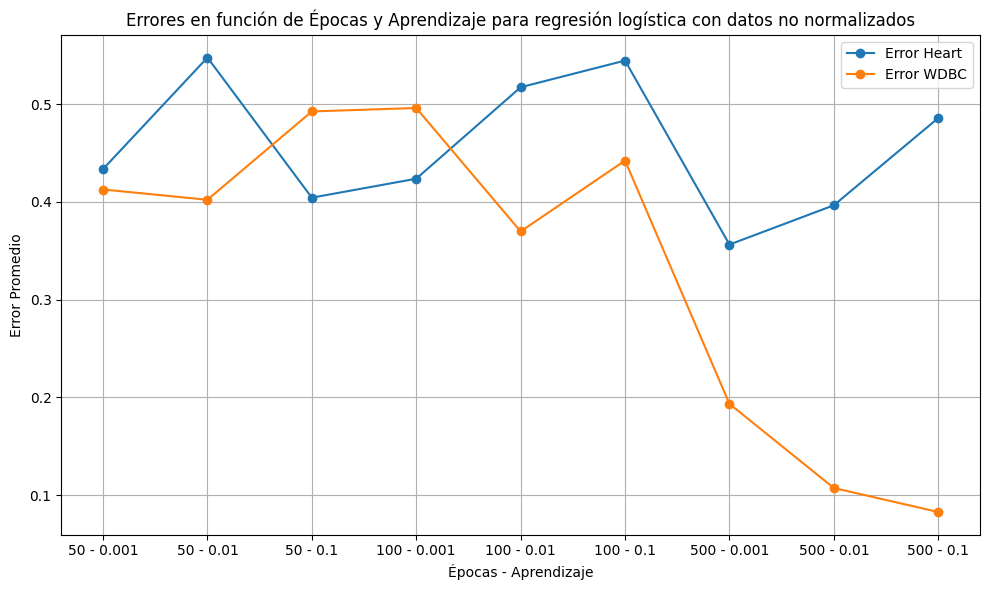

In [2]:
import numpy as np
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
import matplotlib.pyplot as plt

error_heart = []
error_wdbc = []

epocas = [50, 100, 500]
aprendizajes = [0.001, 0.01, 0.1]

for epoca in epocas:
    for aprendizaje in aprendizajes: 
        rl = ClasificadorRegresionLogistica(epocas=epoca, aprendizaje=aprendizaje)
        validacion_cruzada = ValidacionCruzada()
        error_heart.append(np.mean(rl.validacion(validacion_cruzada, dataset_heart, rl)))
        validacion_cruzada = ValidacionCruzada()
        error_wdbc.append(np.mean(rl.validacion(validacion_cruzada, dataset_wdbc, rl)))

labels = [f"{epoca} - {aprendizaje}" for epoca in epocas for aprendizaje in aprendizajes]

print(f"Error mínimo regresión logística en Heart:{min(error_heart)}, obtenido con {epocas[error_heart.index(min(error_heart)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_heart.index(min(error_heart)) % 3]}")
print(f"Error mínimo regresión logística en WDBC: {min(error_wdbc)}, obtenido con {epocas[error_wdbc.index(min(error_wdbc)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_wdbc.index(min(error_wdbc)) % 3]}")

plt.figure(figsize=(10, 6))
plt.plot(labels, error_heart, label="Error Heart", marker='o')
plt.plot(labels, error_wdbc, label="Error WDBC", marker='o')

plt.title("Errores en función de Épocas y Aprendizaje para regresión logística con datos no normalizados")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Error mínimo regresión logística en Heart:0.16891185554763602, obtenido con 500 épocas y ratio de aprendizaje 0.1
Error mínimo regresión logística en WDBC:0.019329296693060084, obtenido con 500 épocas y ratio de aprendizaje 0.1


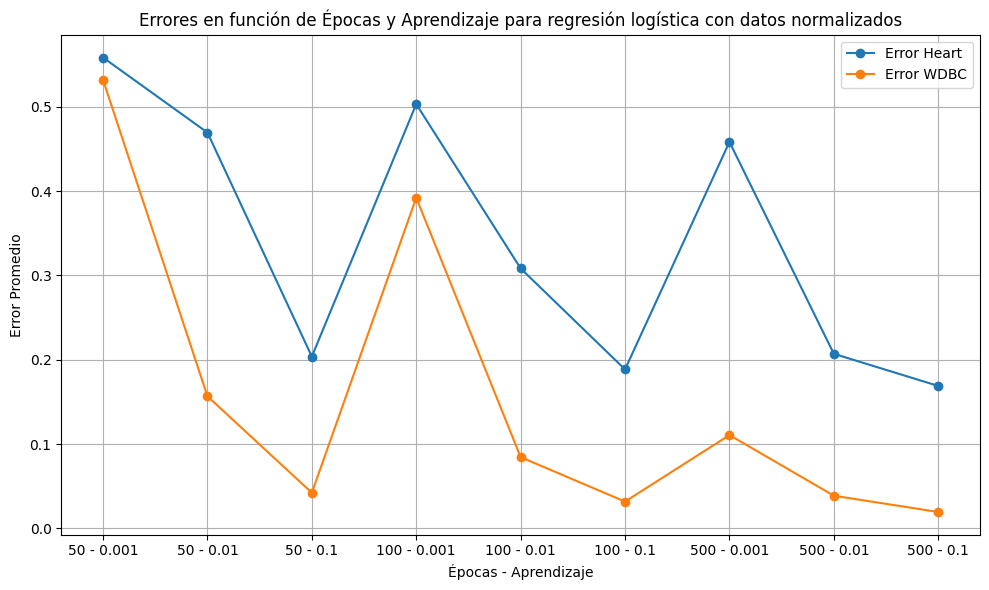

In [3]:
import numpy as np
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
import matplotlib.pyplot as plt

error_heart = []
error_wdbc = []

epocas = [50, 100, 500]
aprendizajes = [0.001, 0.01, 0.1]

for epoca in epocas:
    for aprendizaje in aprendizajes: 
        rl = ClasificadorRegresionLogistica(epocas=epoca, aprendizaje=aprendizaje)
        validacion_cruzada = ValidacionCruzada()
        error_heart.append(np.mean(rl.validacion(validacion_cruzada, dataset_heart_norm, rl)))
        validacion_cruzada = ValidacionCruzada()
        error_wdbc.append(np.mean(rl.validacion(validacion_cruzada, dataset_wdbc_norm, rl)))

labels = [f"{epoca} - {aprendizaje}" for epoca in epocas for aprendizaje in aprendizajes]

print(f"Error mínimo regresión logística en Heart:{min(error_heart)}, obtenido con {epocas[error_heart.index(min(error_heart)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_heart.index(min(error_heart)) % 3]}")
print(f"Error mínimo regresión logística en WDBC:{min(error_wdbc)}, obtenido con {epocas[error_wdbc.index(min(error_wdbc)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_wdbc.index(min(error_wdbc)) % 3]}")

plt.figure(figsize=(10, 6))
plt.plot(labels, error_heart, label="Error Heart", marker='o')
plt.plot(labels, error_wdbc, label="Error WDBC", marker='o')

plt.title("Errores en función de Épocas y Aprendizaje para regresión logística con datos normalizados")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Podemos observar que la no estandarización de las características afecta directamente al rendimiento de la regresión logística esto es debido a la naturaleza del proceso de cálculo de pesos. Cuando existen características con escalas significativamente diferentes, aquellas con valores mayores introducen un factor de cambio desproporcionado para las componentes del vector de pesos que correspondan a estos valores, esto introduce un sesgo en los pesos estimados, y como resultado, el modelo puede subestimar o ignorar la contribución de características relevantes pero con menor escala, impactando negativamente la precisión y generalización del clasificador. Este efecto se observa claramente en ambos datasets: en "Heart" vemos un error mínimo de 0.41 para el caso sin estandarizar y 0.17 para el caso estandarizado, es decir, el estandarizado genera una clasificación 2.41 veces mejor; mientras que en el dataset "WDBC" los errores son 0.10 sin estandarizar y 0.02 estandarizado, teniendo una clasificación 5 veces mejor para el caso estandarizado. Por ello vamos a emplear los datos estandarizados para las regresiones logísticas.

Por otra parte, analizando cómo varía la precisión del modelo y la tasa de error en función del número de épocas y el factor de aprendizaje apreciamos una tendencia clara: al incrementar ambos parámetros, el error disminuye considerablemente, indicando que el modelo logra aprender de manera más efectiva y con mayor capacidad de ajuste. Sin embargo, si incrementasemos el número de épocas y/o factor de aprendizaje veriamos como este efecto no es lineal, ya que existe un punto en el que aumentar el número de épocas o el factor de aprendizaje deja de ser beneficioso y conduce al sobreentrenamiento.
En este caso, se observa un rendimiento óptimo alrededor de 500 épocas y un factor de aprendizaje de 0.1, donde el modelo alcanza un balance ideal entre tiempo de entrenamiento y precisión. Esta combinación específica permite aprovechar al máximo los datos sin caer en problemas como un aprendizaje demasiado lento (factores de aprendizaje bajos) o la falta de ajuste por sobreentrenamiento (épocas excesivas o factores altos).

# Apartado 2
Resultados de la clasificación utilizando los algoritmos de
Scikit-Learn para regresión logística. Comparación con los
resultados de la implementación propia. En los resultados
utilizar los mismos valores de constante de aprendizaje y
pasos que en la implementación propia.

/home/santacg/Code/Venvs/FAA_venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Error mínimo regresión logística SKlearn en Heart: 0.16783677833214541, obtenido con 50 épocas y ratio de aprendizaje 0.1
Error mínimo SGD en Heart: 0.1537241625089095, obtenido con 50 épocas y ratio de aprendizaje 0.001
Error mínimo regresión logística SKlearn en WDBC: 0.026346840552709205, obtenido con 50 épocas y ratio de aprendizaje 0.1
Error mínimo SGD en WDBC: 0.026346840552709205, obtenido con 50 épocas y ratio de aprendizaje 0.1


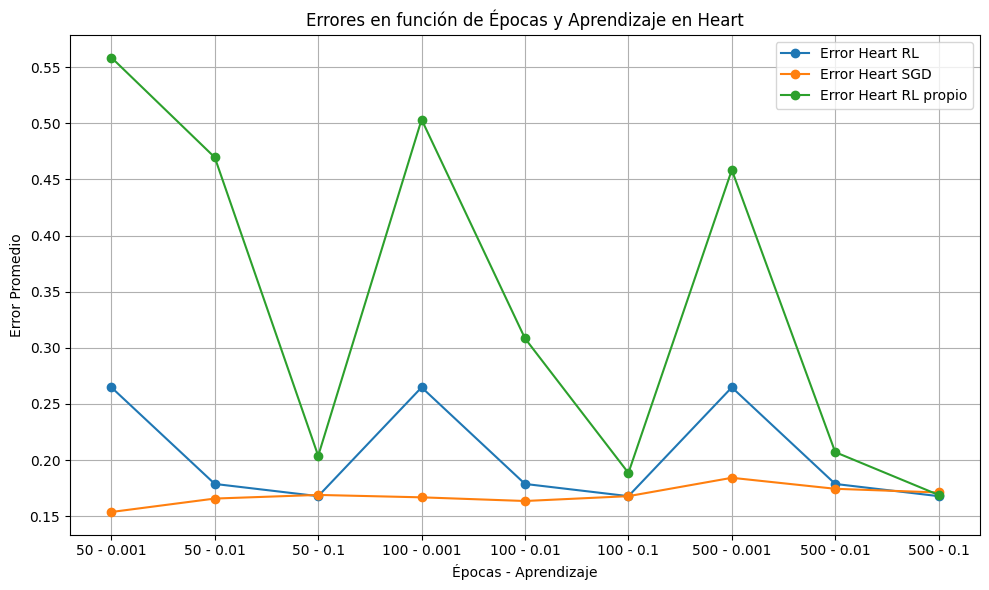

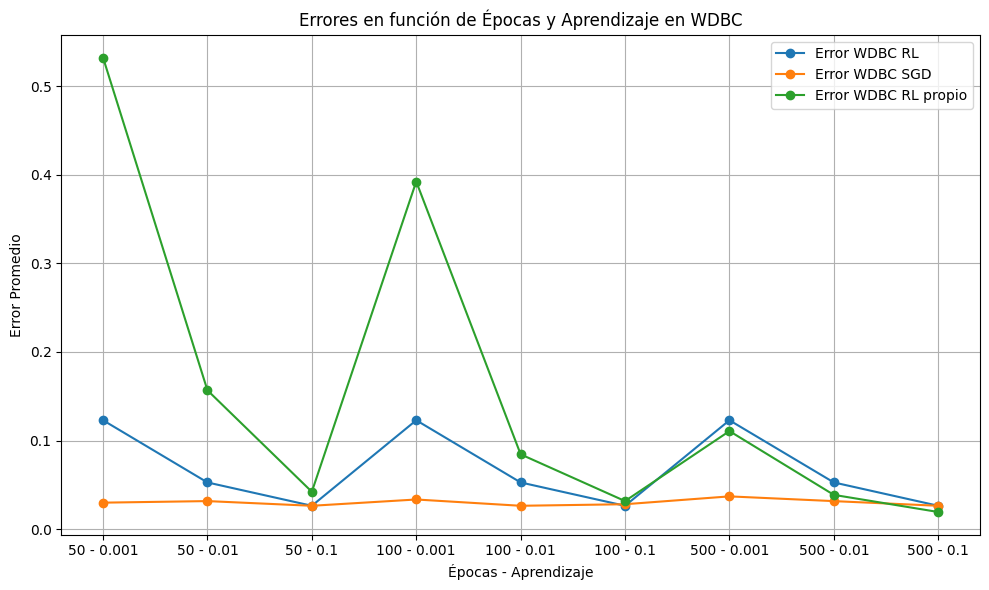

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ClasificadorRegresionLogistica import ClasificadorRegresionLogisticaSK, ClasificadorSGD
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada

error_heart_logsk = []
error_wdbc_logsk = []
error_heart_sgdsk = []
error_wdbc_sgdsk = []

epocas = [50, 100, 500]
aprendizajes = [0.001, 0.01, 0.1]

for epoca in epocas:
    for aprendizaje in aprendizajes: 
        rl_sk = ClasificadorRegresionLogisticaSK(maxiter=epoca, aprendizaje=aprendizaje)
        sgd_sk = ClasificadorSGD(maxiter=epoca, aprendizaje=aprendizaje)
        validacion_cruzada = ValidacionCruzada()
        error_heart_sgdsk.append(np.mean(sgd_sk.validacion(validacion_cruzada, dataset_heart_norm, sgd_sk)))
        error_heart_logsk.append(np.mean(rl_sk.validacion(validacion_cruzada, dataset_heart_norm, rl_sk)))
        validacion_cruzada = ValidacionCruzada()
        error_wdbc_sgdsk.append(np.mean(sgd_sk.validacion(validacion_cruzada, dataset_wdbc_norm, sgd_sk)))
        error_wdbc_logsk.append(np.mean(rl_sk.validacion(validacion_cruzada, dataset_wdbc_norm, rl_sk)))

print(f"Error mínimo regresión logística SKlearn en Heart: \
{min(error_heart_logsk)}, obtenido con {epocas[error_heart_logsk.index(min(error_heart_logsk)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_heart_logsk.index(min(error_heart_logsk)) % 3]}")
print(f"Error mínimo SGD en Heart: \
{min(error_heart_sgdsk)}, obtenido con {epocas[error_heart_sgdsk.index(min(error_heart_sgdsk)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_heart_sgdsk.index(min(error_heart_sgdsk)) % 3]}")

print(f"Error mínimo regresión logística SKlearn en WDBC: \
{min(error_wdbc_logsk)}, obtenido con {epocas[error_wdbc_logsk.index(min(error_wdbc_logsk)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_wdbc_logsk.index(min(error_wdbc_logsk)) % 3]}")
print(f"Error mínimo SGD en WDBC: \
{min(error_wdbc_sgdsk)}, obtenido con {epocas[error_wdbc_sgdsk.index(min(error_wdbc_sgdsk)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_wdbc_sgdsk.index(min(error_wdbc_sgdsk)) % 3]}")

labels = [f"{epoca} - {aprendizaje}" for epoca in epocas for aprendizaje in aprendizajes]

plt.figure(figsize=(10, 6))
plt.plot(labels, error_heart_logsk, label="Error Heart RL", marker='o')
plt.plot(labels, error_heart_sgdsk, label="Error Heart SGD", marker='o')
plt.plot(labels, error_heart, label="Error Heart RL propio", marker='o')

plt.title("Errores en función de Épocas y Aprendizaje en Heart")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(labels, error_wdbc_logsk, label="Error WDBC RL", marker='o')
plt.plot(labels, error_wdbc_sgdsk, label="Error WDBC SGD", marker='o')
plt.plot(labels, error_wdbc, label="Error WDBC RL propio", marker='o')
plt.title("Errores en función de Épocas y Aprendizaje en WDBC")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

En el caso de la implementación de la regresión logística de SKlearn, su menor sensibilidad al número de épocas y al factor de aprendizaje puede atribuirse al uso del solver por defecto LBFGS. Este algoritmo de optimización, está diseñado específicamente para problemas convexos como la regresión logística, utilizando métodos basados en gradientes y aproximaciones hessianas para encontrar eficientemente el mínimo de la función. LBFGS no depende directamente de un esquema iterativo controlado por épocas o factores de aprendizaje, lo que permite que el modelo converja rápidamente, como se observa al encontrar el punto óptimo en solo 50 épocas con un factor de aprendizaje de 0.1.

Por otra parte, el algoritmo basado en SGD muestra una insensibilidad notable frente a cambios en el número de épocas o el factor de aprendizaje. Este comportamiento puede deberse a la rápida convergencia del método.

# Apartado 3
Para la evaluación de los Espacios ROC y la Curva AUC de los modelos pertinentes para nuestros 3 datasets(HEART, IRIS, WDBC), usarmeos los siguientes hiperparámetros y condiciones.

Para Naive Bayes usaremos una Validación Simple debido a que en la primera práctica vimos que fue lo más óptimo a la hora de analizar los resultados.

Para KNN, usaremos una Validación Simple + un valor de K=11.

Y finalmente, para nuestra regresión lineal usaremos un n_epoch = 500 y un learning rate de 0.1, podemos ver como en el apartado anterior obtuvimos los mejores resultados con dichos hiperparámetros.




Dataset: HEART

Clasificador: Naive Bayes
Predicciones binarias generadas: [1 0 0 1 0 1 1 1 0 1]
TP: 133, FP: 31, TN: 97, FN: 14
TPR: 0.9047619047619048, FPR: 0.2421875

Clasificador: KNN
Predicciones binarias generadas: [1 0 0 1 0 1 1 1 0 1]
TP: 129, FP: 29, TN: 99, FN: 18
TPR: 0.8775510204081632, FPR: 0.2265625

Clasificador: Regresión Logística
Scores generados por el modelo: [0.83401254 0.1690882  0.12221146 0.97591046 0.22061112 0.95595017
 0.86741231 0.98224501 0.02565544 0.94617555]
Predicciones binarias generadas: [1 0 0 1 0 1 1 1 0 1]
TP: 128, FP: 31, TN: 97, FN: 19
TPR: 0.8707482993197279, FPR: 0.2421875
AUC: 0.8936277636054423


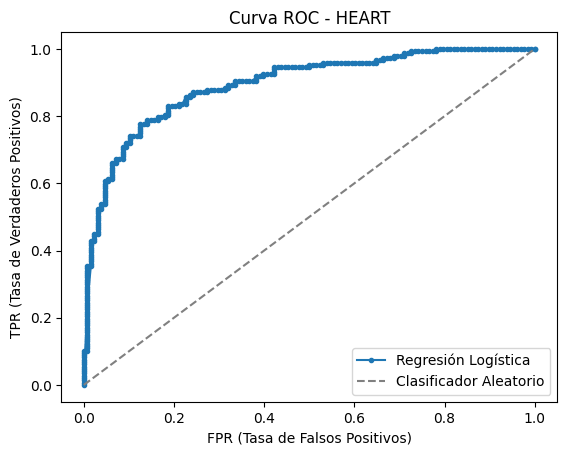

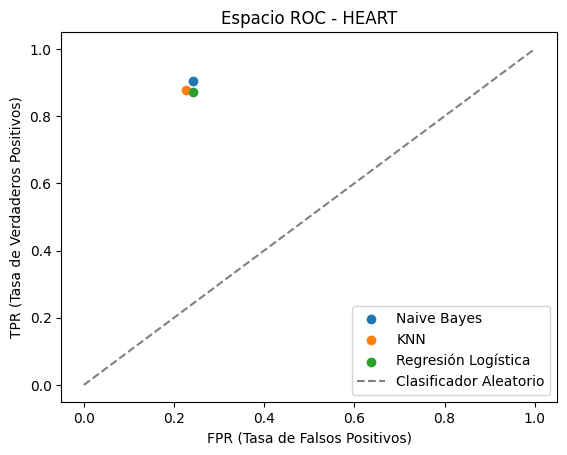


Dataset: WDBC

Clasificador: Naive Bayes
Predicciones binarias generadas: [1 0 1 0 0 0 1 0 1 1]
TP: 61, FP: 6, TN: 100, FN: 4
TPR: 0.9384615384615385, FPR: 0.05660377358490566

Clasificador: KNN
Predicciones binarias generadas: [1 0 1 0 0 0 1 0 1 1]
TP: 60, FP: 2, TN: 104, FN: 5
TPR: 0.9230769230769231, FPR: 0.018867924528301886

Clasificador: Regresión Logística
Scores generados por el modelo: [9.99942457e-01 9.21520595e-01 9.99822986e-01 7.28204281e-05
 4.77399212e-03 9.70972070e-02 9.99977209e-01 8.25890936e-06
 9.99283512e-01 9.99993925e-01]
Predicciones binarias generadas: [1 1 1 0 0 0 1 0 1 1]
TP: 65, FP: 3, TN: 103, FN: 0
TPR: 1.0, FPR: 0.02830188679245283
AUC: 0.9992743105950653


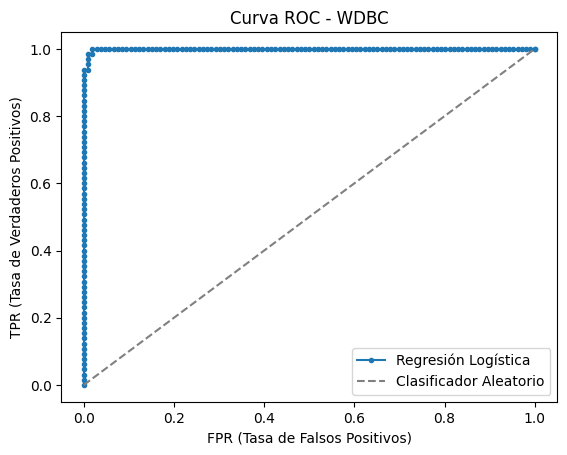

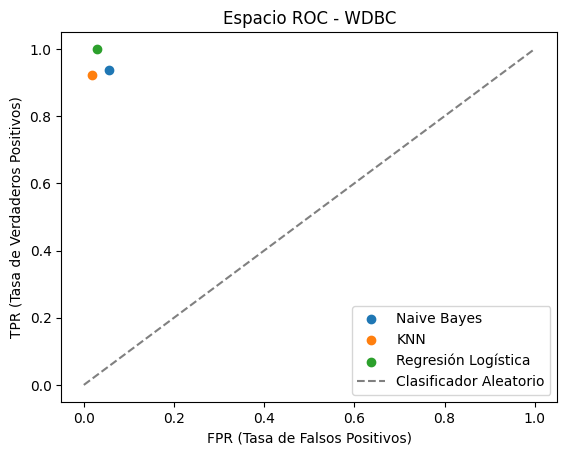


Dataset: IRIS

Clasificador: Naive Bayes
Predicciones binarias generadas: [1 0 0 0 1 0 0 0 1 0]
TP: 56, FP: 7, TN: 102, FN: 6
TPR: 0.9032258064516129, FPR: 0.06422018348623854

Clasificador: KNN
Predicciones binarias generadas: [1 0 1 0 1 0 0 0 1 0]
TP: 57, FP: 3, TN: 106, FN: 5
TPR: 0.9193548387096774, FPR: 0.027522935779816515

Clasificador: Regresión Logística
Scores generados por el modelo: [9.99999939e-01 5.74324867e-05 8.66049329e-01 4.23150049e-04
 1.00000000e+00 2.02450683e-01 3.24313763e-01 2.88735699e-03
 9.99947289e-01 6.33692751e-02]
Predicciones binarias generadas: [1 0 1 0 1 0 0 0 1 0]
TP: 59, FP: 4, TN: 105, FN: 3
TPR: 0.9516129032258065, FPR: 0.03669724770642202
AUC: 0.9893459603432969


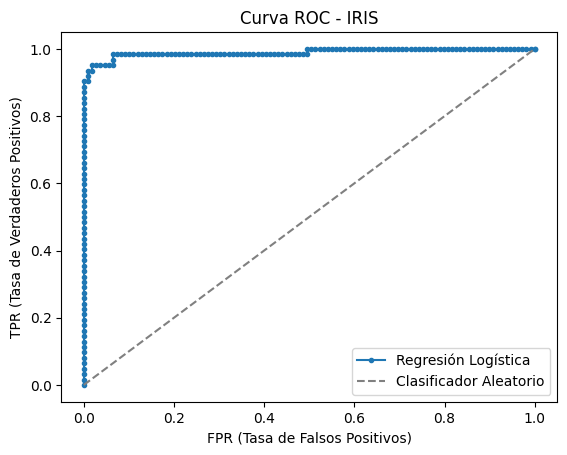

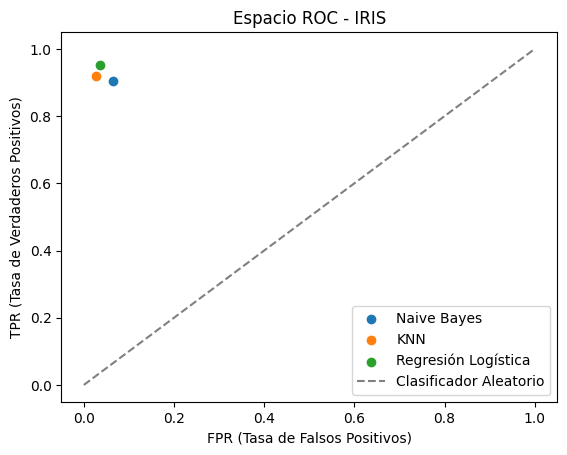

In [5]:
import Datos
import numpy as np
from EstrategiaParticionado import ValidacionSimple
from ClasificadorNB import ClasificadorNaiveBayes
from ClasificadorKNN import ClasificadorKNN
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
import matplotlib.pyplot as plt

datasets = ['Datasets/heart.csv', 'Datasets/wdbc.csv', 'Datasets/wdbc.csv']
nombres_datasets = ['HEART', 'WDBC', 'IRIS']

clasificadores = {
    'Naive Bayes': ClasificadorNaiveBayes(),
    'KNN': ClasificadorKNN(K=11),
    'Regresión Logística': ClasificadorRegresionLogistica(epocas=500, aprendizaje=0.1)
}

for idx_dataset, dataset_name in enumerate(datasets):
    print(f"\nDataset: {nombres_datasets[idx_dataset]}")
    dataset = Datos.Datos(dataset_name)
    
    # Preparar validación simple
    particionado = ValidacionSimple(1, 0.3)  
    particiones = particionado.creaParticiones(dataset.datos)
    
    particion = particiones[0]
    datos_train = dataset.extraeDatos(particion.indicesTrain).reset_index(drop=True)
    datos_test = dataset.extraeDatos(particion.indicesTest).reset_index(drop=True)
    
    atributos_nominales = dataset.nominalAtributos
    diccionario = dataset.diccionarios
    
    # Normalizar los datos con la función `estandarizarDatos`
    datos_train, media, std = Datos.estandarizarDatos(datos_train, atributos_nominales, diccionario)
    datos_test, _, _ = Datos.estandarizarDatos(datos_test, atributos_nominales, diccionario, media, std)
    
    TPRs = []
    FPRs = []
    nombres_clasificadores = []
    
    for nombre_clasificador, clasificador in clasificadores.items():
        print(f"\nClasificador: {nombre_clasificador}")

        clasificador.entrenamiento(datos_train, atributos_nominales, diccionario)

        if nombre_clasificador == 'Regresión Logística':
            scores, predicciones = clasificador.clasifica(datos_test, atributos_nominales, diccionario, return_scores=True)
            print("Scores generados por el modelo:", scores[:10])
            print("Predicciones binarias generadas:", predicciones[:10])

        else:
            predicciones = clasificador.clasifica(datos_test, atributos_nominales, diccionario)
            print("Predicciones binarias generadas:", predicciones[:10])

        TP, FP, TN, FN = clasificador.matriz_confusion(datos_test, predicciones)
        print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
        
        # Calcular TPR y FPR
        if (TP + FN) > 0:
            TPR = TP / (TP + FN)
        else:
            TPR = 0  # Asignar 0 si el denominador es 0  

        if (FP + TN) > 0:
            FPR = FP / (FP + TN)
        else:
            FPR = 0 
        print(f"TPR: {TPR}, FPR: {FPR}")
        
        TPRs.append(TPR)
        FPRs.append(FPR)
        nombres_clasificadores.append(nombre_clasificador)

        # Curva ROC para la Regresión Logística
        if nombre_clasificador == 'Regresión Logística':
            clases_reales = datos_test['Class'].values

            unique_scores = np.unique(scores)
            umbrales = sorted(unique_scores, reverse=True) 

            TPR_list = []
            FPR_list = []
            
            for umbral in umbrales:
                pred_binarias = (scores >= umbral).astype(int)  # True se convierte en 1, False en 0

                TP_umbral, FP_umbral, TN_umbral, FN_umbral = clasificador.matriz_confusion(datos_test, pred_binarias)

                # Calcular TPR (True Positive Rate)
                if (TP_umbral + FN_umbral) > 0:
                    TPR_umbral = TP_umbral / (TP_umbral + FN_umbral)
                else:
                    TPR_umbral = 0  # Asignar 0 si el denominador es 0  

                # Calcular FPR (False Positive Rate)
                if (FP_umbral + TN_umbral) > 0:
                    FPR_umbral = FP_umbral / (FP_umbral + TN_umbral)
                else:
                    FPR_umbral = 0  

                TPR_list.append(TPR_umbral)
                FPR_list.append(FPR_umbral) 
            
            TPR_list.insert(0, 0)
            TPR_list.append(1)

            FPR_list.insert(0, 0)
            FPR_list.append(1)

            sorted_indices = np.argsort(FPR_list)
            
            FPR_list = np.array(FPR_list)[sorted_indices]
            TPR_list = np.array(TPR_list)[sorted_indices]

            auc = 0
            for i in range(1, len(FPR_list)):  # Fórmula del cálculo del área de un trapecio (base * (altura derecha + altura izq) /2)
                auc += (FPR_list[i] - FPR_list[i-1]) * (TPR_list[i] + TPR_list[i-1]) / 2
            auc = auc 
            print(f"AUC: {auc}")

            plt.figure()
            plt.plot(FPR_list, TPR_list, marker='.', label='Regresión Logística')
            plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Clasificador Aleatorio')
            plt.title(f'Curva ROC - {nombres_datasets[idx_dataset]}')
            plt.xlabel('FPR (Tasa de Falsos Positivos)')
            plt.ylabel('TPR (Tasa de Verdaderos Positivos)')
            plt.legend()
            plt.show()

    plt.figure()
    for i, nombre_clasificador in enumerate(nombres_clasificadores):
        plt.scatter(FPRs[i], TPRs[i], label=nombre_clasificador)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Clasificador Aleatorio')
    plt.title(f'Espacio ROC - {nombres_datasets[idx_dataset]}')
    plt.xlabel('FPR (Tasa de Falsos Positivos)')
    plt.ylabel('TPR (Tasa de Verdaderos Positivos)')
    plt.legend()
    plt.show()


Comenzaremos analizando los resultados obtenidos para el dataset de 'HEART'.

Podemos observar que para nuestro Naive Bayes, obtenemos un valor de TPR = 0.89 lo cual podríamos considerarlo como un valor 'alto', aunque su valor de FPR = 0.16, nos propone que aunque Naive Bayes obtiene una buena tasa de verdaderos positivos, también tiene una tasa de falsos negativos más alto que el resto de casos que vamos a explorar. Por lo general es un modelo sólido.

El segundo modelo a analizar, el KNN con K = 11, nos otorga unos valores de TPR = 0.85, ligeramente inferior a NB pero con un FPR = 0.14, identificando menos falsos negativos que NB.

Por último, nuestra Regresión Logística obtiene unos reusltados parecidos a KNN, con un TPR = 0.83, el más bajo de todos y con un FPR = 0.14.

Ahora bien, dado el contexto de este dataset, el cual se basa en la detección de enfermedades, debemos priorizar el valor de TPR.ya que identificar correctamente los casos positivos (personas enfermas) es generalmente más importante que minimizar los falsos positivos (personas sanas mal diagnosticadas). A pesar de tener el valor más alto de FPR de los 3 modelos, su superioridad para la detección de los casos positivos nos hacen decantarnos hacia el algoritmo de Naive Bayes usando Validación Simple.


El segundo dataset a analizar es el de WDBC.

El Naive Bayes propio consigue un gran desempeño con un TPR = 0.93 y un FPR = 0.035. Éstos son valores que determinan un modelo exitoso.

El KNN mejora el rendimiento de Naive Bayes se manera significativa, destacando un mejor TPR, con un valor de 0.95, y con una mejora considerable en el FPR, con FPR = 0.018. Esto nos indica que para este dataset nuetsro KNN obtiene una tasa de falsos positivos menor a la de NB.

Finalmente, el modelo de Regresión Logística es el que mejor se adapta sin ningún tipo de duda, podemos observar en el espacio ROC la manera en la que se ajusta de manera casi perfecta a los datos. Hemos obtenido un valor de TPR = 1.0(PERFECTO) y un FPR = 0.044

Aunque todos los clasificadores funcionan bien, la Regresión Logística supera a los demás con una tasa perfecta de verdaderos positivos y un AUC casi perfecto.


Por último, tenemos el dataset de 'IRIS'.

Para nuestro Naive Bayes, hemos logrado un TPR = 0.92 y un FPR = 0.08, mostrando un desempeño muy bueno con un TPR alto y un FOR moderado.

El KNN propio mejora el TPR anterior con un valor de 0.94 y mantiene un FPR parecido, con un valor también de 0.09. KNN es capaz de lograr un excelente equilibrio entre un TPR muy alto y un FPR moderado.

Finalmente, una vez más, nuetsra Regresión Logística mejora con creces a ambos modelos con una tasa de positivos reales casi perfecta. TPR = 0.98 y un FPR igualado a los anteriores (0.09). 

Es por ello que para este último datset concluimos conque la Regresión Logística es el que mejor se ha conseguido adaptar, aunque los resultados de los otros 2 modelos también son muy aceptables.

Una vez terminada esta observación de los 3 datasets, podemos concluir que:

El éxito de la regresión logística en los datasets WDBC e IRIS, en comparación con el dataset HEART, se debe principalmente a las diferencias en la naturaleza de las características y la separabilidad de las clases en los datos.

En el caso de HEART, el dataset contiene una combinación de variables categóricas y numéricas que a pesar de que sean relevantes, introducen cierta complejidad y ruido al modelo. Desde la perspectiva de la Regresión Logística, esto produce un efecto adverso a la hora de encontrar patrones que sean considerados efectivos debido a que no es un modelo capacitado para manejar relaciones no lineales o lo que vendría siendo en nuestro caso, interacciones complejas entre variables.

Por otro lado, en WDBC, las características son exclusivamente numéricas, continuas altamenete correlacionadas entre sí, lo que permite a la regresión logística modelar eficazmente las relaciones entre las variables y las clases. En IRIS, el dataset es aún más simple, con solo cuatro características numéricas que describen dimensiones físicas de flores, y las clases están claramente separadas en el espacio de características, lo que facilita la identificación de límites de decisión lineales.

# Apartado 4
Análisis descrito en la sección de Tareas para el algoritmo de
clustering K-means, es decir:

• Para K=3, comprobar si se puede asignar de forma unívoca cada
clúster a un tipo de flor atendiendo a la clase mayoritaria de los
patrones agrupados por clúster

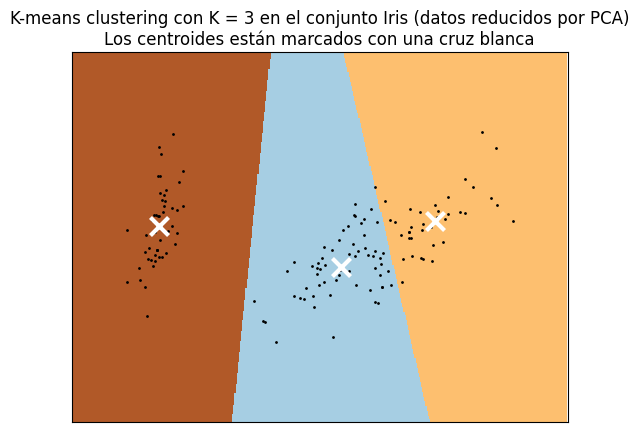

Asignaciones de clusteres a clases mayoritarias:
Clúster 0: Clase mayoritaria 1
Clúster 1: Clase mayoritaria 2
Clúster 2: Clase mayoritaria 0
Cada cluster se asigna de forma unívoca a una clase.


In [6]:
import numpy as np
from ClusteringKMeans import ClusteringKMeans
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt

X = iris_data.drop(columns='Class').values
y = iris_data['Class'].values

kmeans = ClusteringKMeans(3)
centroides, asignaciones = kmeans.kmeans(iris_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
centroides_reducidos = pca.transform(centroides)

h = 0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

grid_data = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_data)

distancias_grid = np.linalg.norm(grid_original[:, np.newaxis] - centroides, axis=2)
Z = np.argmin(distancias_grid, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation='nearest',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect='auto',
    origin='lower'
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

plt.scatter(
    centroides_reducidos[:, 0],
    centroides_reducidos[:, 1],
    marker='x',
    s=169,
    linewidths=3,
    color='w',
    zorder=10
)

plt.title(
    f"K-means clustering con K = {3} en el conjunto Iris (datos reducidos por PCA)\n"
    "Los centroides están marcados con una cruz blanca"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

cluster_labels = {}

for cluster in np.unique(asignaciones):
    cluster_indices = np.where(asignaciones == cluster)[0]
    cluster_clases = y[cluster_indices]
    class_counts = Counter(cluster_clases)
    clase_mayor = class_counts.most_common(1)[0][0]
    cluster_labels[cluster] = clase_mayor

print("Asignaciones de clusteres a clases mayoritarias:")
for cluster, clase_mayor in cluster_labels.items():
    print(f"Clúster {cluster}: Clase mayoritaria {clase_mayor}")

unique_clases_mayor = set(cluster_labels.values())
if len(unique_clases_mayor) == len(cluster_labels):
    print("Cada cluster se asigna de forma unívoca a una clase.")
else:
    print("Al menos un cluster no se puede asignar de forma unívoca a una clase.")


El análisis del agrupamiento K-means para K=3 en el conjunto Iris demuestra que los clústeres generados pueden asignarse unívocamente a las clases de flores basándose en la clase mayoritaria dentro de cada clúster. La clase Setosa se identifica claramente debido a sus características distintivas, lo que resulta en un clúster prácticamente perfecto. Por otro lado, las clases Versicolor y Virginica, aunque presentan cierta superposición en sus características, pueden separarse suficientemente, permitiendo que cada clúster esté dominado por una clase. 

• Analizar qué tipos de flor se identifican más fácilmente (con menos
errores), cuales más difícilmente (con más errores), y cuales se
confunden entre ellos. Para ello se puede hacer uso de la matriz de
confusión multiclase a partir del número de puntos en cada clase y
sabiendo que hay 50 ejemplos de cada tipo de flor.

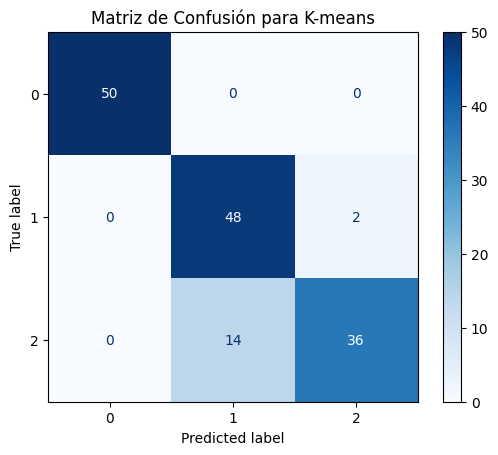

In [7]:
unique_clusters = np.unique(asignaciones)
cluster_labels = {}

for cluster in unique_clusters:
    cluster_indices = np.where(asignaciones == cluster)[0]
    cluster_clases = y[cluster_indices]
    clase_mayor = np.bincount(cluster_clases).argmax() 
    cluster_labels[cluster] = clase_mayor

predicciones = np.array([cluster_labels[cluster] for cluster in asignaciones])

cm = confusion_matrix(y, predicciones)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y)).plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión para K-means")
plt.show()

La matriz de confusión obtenida con K-means para K=3 en el conjunto Iris nos muestra que la clase Setosa es perfectamente identificada, ya que sus 50 ejemplos están correctamente agrupados, sugiriendo que sus características son claramente distintivas y permiten una separación directa respecto a las demás clases. Por otro lado, la clase Versicolor presenta un alto nivel de precisión con 48 de sus ejemplos correctamente asignados, aunque dos de ellos se confunden con la clase Virginica, lo que indica una ligera superposición entre ambas. En contraste, la clase Virginica resulta la más difícil de identificar, aunque 36 ejemplos son clasificados correctamente, 14 se confunden con la clase Versicolor, evidenciando un solapamiento significativo en las características de estas dos clases. Este resultado refleja que Setosa es la clase más fácil de separar, mientras que la confusión predominante entre Versicolor y Virginica destaca la complejidad de diferenciar estos grupos en el espacio de características utilizado.

• Probar con otros valores de K = [2,4,5] y comparar los resultados con
los obtenidos para k=3. ¿Cuál sería el mejor K para este problema?

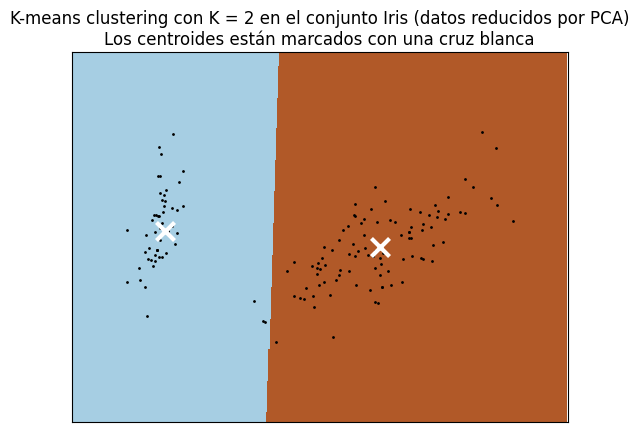

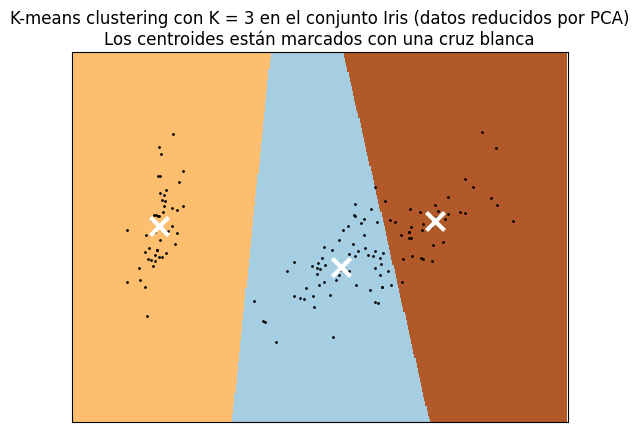

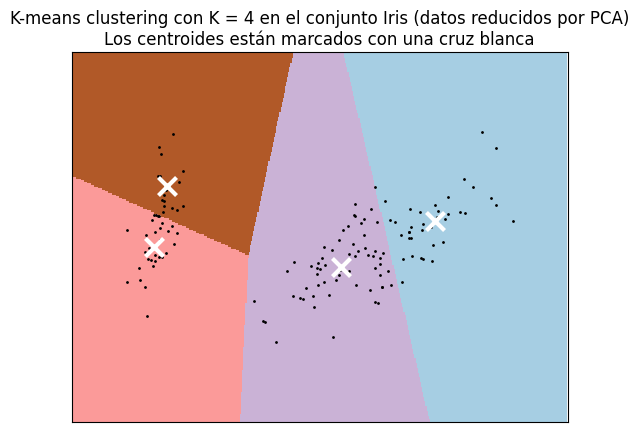

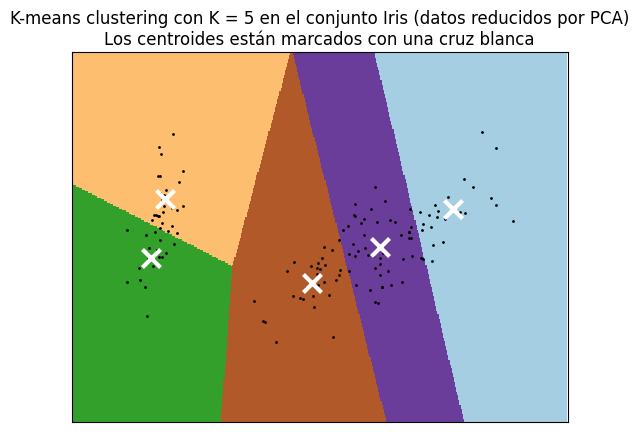

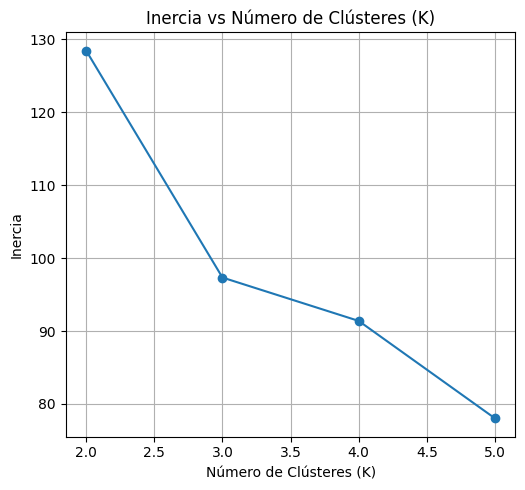

In [13]:
import numpy as np
from ClusteringKMeans import ClusteringKMeans
import matplotlib.pyplot as plt

k_values = [2,3,4,5]
inercias = []

for k in k_values:
    
    X = iris_data.drop(columns='Class').values
    y = iris_data['Class'].values
    
    kmeans = ClusteringKMeans(k)
    centroides, asignaciones = kmeans.kmeans(iris_data)

    inercia = np.sum([np.linalg.norm(X[asignaciones == i] - centroides[i], axis=1).sum() for i in range(k)])
    inercias.append(inercia)

    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    centroides_reducidos = pca.transform(centroides)
    
    h = 0.02
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_original = pca.inverse_transform(grid_data)
    
    distancias_grid = np.linalg.norm(grid_original[:, np.newaxis] - centroides, axis=2)
    Z = np.argmin(distancias_grid, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation='nearest',
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect='auto',
        origin='lower'
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    
    plt.scatter(
        centroides_reducidos[:, 0],
        centroides_reducidos[:, 1],
        marker='x',
        s=169,
        linewidths=3,
        color='w',
        zorder=10
    )
    
    plt.title(
        f"K-means clustering con K = {k} en el conjunto Iris (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inercias, marker='o', label='Inercia')
plt.title('Inercia vs Número de Clústeres (K)')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.grid()

plt.tight_layout()
plt.show()

Hemos utilizado la inercia para determinar cuál es el mejor valor de K en el problema de agrupamiento con K-means, la inercia mide la suma de las distancias cuadradas entre cada punto y el centroide de su clúster, proporcionando una métrica de la compactación de los clústeres. Al probar con K=[2,3,4,5], observamos que la inercia disminuye significativamente al pasar de K=2 a K=3, lo que indica una mejora importante en la calidad del agrupamiento al incluir un tercer clúster, sin embargo, para K>3, la reducción en la inercia es mucho menos pronunciada, lo que sugiere que añadir más clústeres no aporta una mejora sustancial y aumenta innecesariamente la complejidad del modelo. Este comportamiento refleja un punto de "codo" en K=3, que representa un buen equilibrio entre la compactación de los clústeres y la simplicidad del modelo. Por lo tanto, concluimos que el mejor valor de K para este problema es K=3, ya que permite capturar adecuadamente la estructura del conjunto de datos y coincide con nuestro conocimiento previo de que el conjunto Iris contiene tres clases naturales.

• Analizar si se obtendrían otros resultados
normalizando los datos

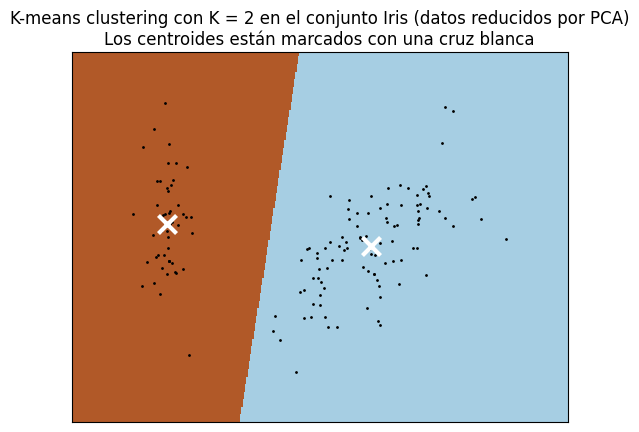

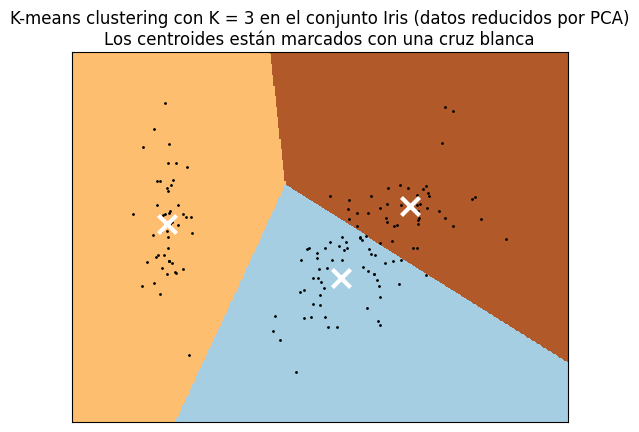

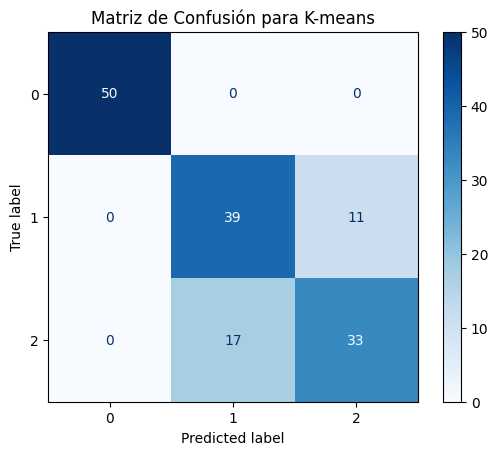

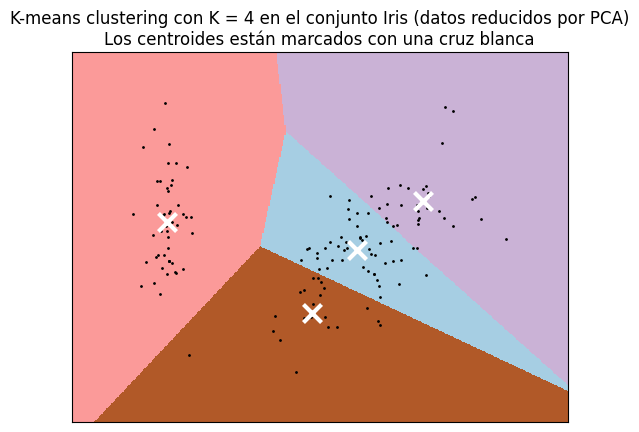

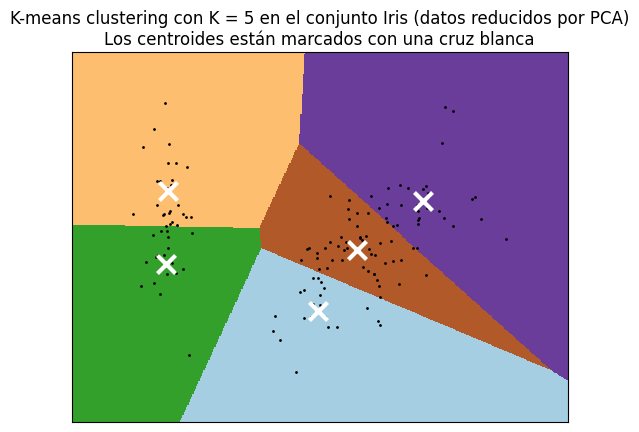

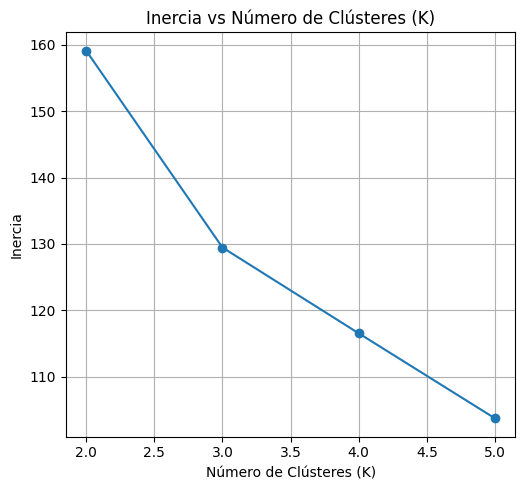

In [17]:
import numpy as np
from ClusteringKMeans import ClusteringKMeans
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt

k_values = [2,3,4,5]
inercias = []

for k in k_values:
    
    X = iris_data_norm.drop(columns='Class').values
    y = iris_data_norm['Class'].values
    
    kmeans = ClusteringKMeans(k)
    centroides, asignaciones = kmeans.kmeans(iris_data_norm)

    inercia = np.sum([np.linalg.norm(X[asignaciones == i] - centroides[i], axis=1).sum() for i in range(k)])
    inercias.append(inercia)

    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    centroides_reducidos = pca.transform(centroides)
    
    h = 0.02
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_original = pca.inverse_transform(grid_data)
    
    distancias_grid = np.linalg.norm(grid_original[:, np.newaxis] - centroides, axis=2)
    Z = np.argmin(distancias_grid, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation='nearest',
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect='auto',
        origin='lower'
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    
    plt.scatter(
        centroides_reducidos[:, 0],
        centroides_reducidos[:, 1],
        marker='x',
        s=169,
        linewidths=3,
        color='w',
        zorder=10
    )
    
    plt.title(
        f"K-means clustering con K = {k} en el conjunto Iris (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()


    if k == 3:
        unique_clusters = np.unique(asignaciones)
        cluster_labels = {}
        
        for cluster in unique_clusters:
            cluster_indices = np.where(asignaciones == cluster)[0]
            cluster_clases = y[cluster_indices]
            clase_mayor = np.bincount(cluster_clases).argmax() 
            cluster_labels[cluster] = clase_mayor
        
        predicciones = np.array([cluster_labels[cluster] for cluster in asignaciones])
        
        cm = confusion_matrix(y, predicciones)
        ConfusionMatrixDisplay(cm, display_labels=np.unique(y)).plot(cmap=plt.cm.Blues)
        plt.title("Matriz de Confusión para K-means")
        plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inercias, marker='o', label='Inercia')
plt.title('Inercia vs Número de Clústeres (K)')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.grid()

plt.tight_layout()
plt.show()

En el análisis de los resultados obtenidos al aplicar K-means con y sin estandarización en el conjunto de datos Iris, se observan diferencias significativas, especialmente en la asignación de las clases Versicolor y Virginica. Sin estandarización, la matriz de confusión muestra un mejor desempeño general, con menor confusión entre estas dos clases. Esto se explica porque el algoritmo da mayor peso a características con escalas más grandes, como el largo del sépalo, que tienen mayor capacidad para separarlas. En cambio, al estandarizar, la confusión entre Versicolor y Virginica aumenta, ya que se iguala la importancia de todas las características, incluidas aquellas menos discriminantes, como las relacionadas con los pétalos, lo que dificulta la separación entre estas clases.

Además, la curva de inercia con estandarización presenta una caída menos pronunciada, lo que indica que la compactación de los clústeres mejora menos al incrementar el número de clústeres. Este efecto refuerza la idea de que al igualar las escalas, las dimensiones menos relevantes influyen más, lo que dificulta la separación de clases con solapamiento significativo, como Versicolor y Virginica.

Con lo cual podríamos concluir que para este dataset la estandarización de los atributos empeora el rendimiento para la clusterización.

# Apartado 5
Repetir el análisis de K-means con la librería Kmeans de
Scikit-learn y comparar los resultados con la
implementación propia

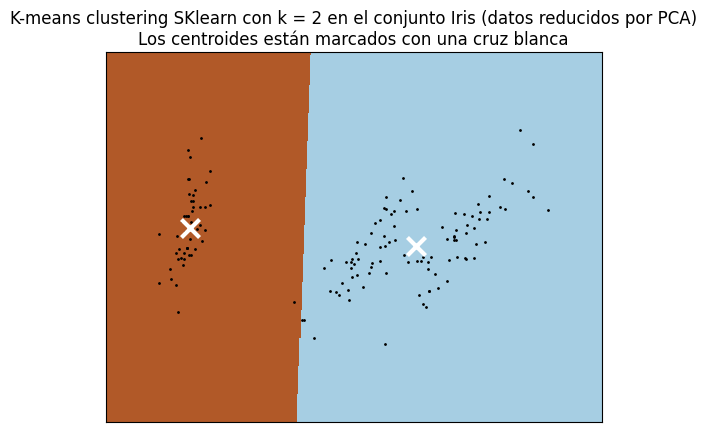

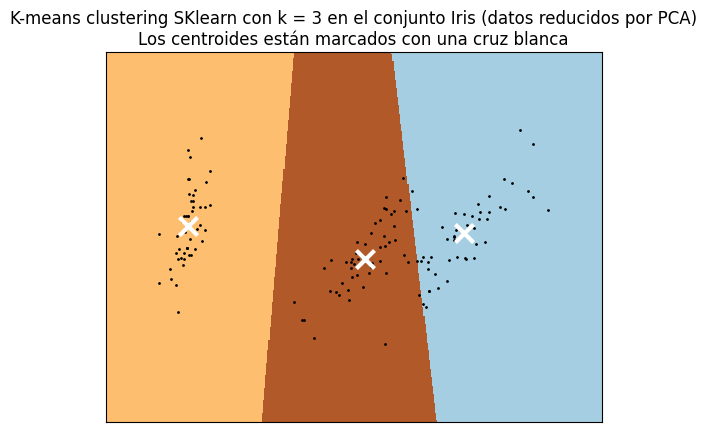

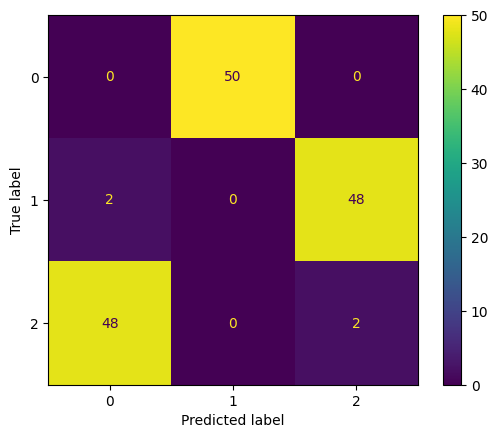

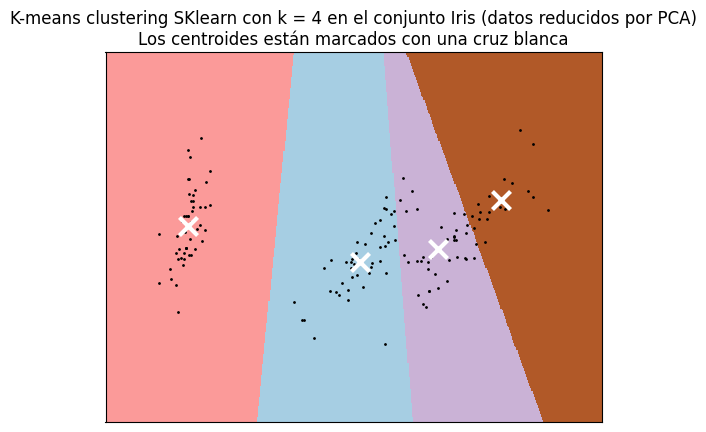

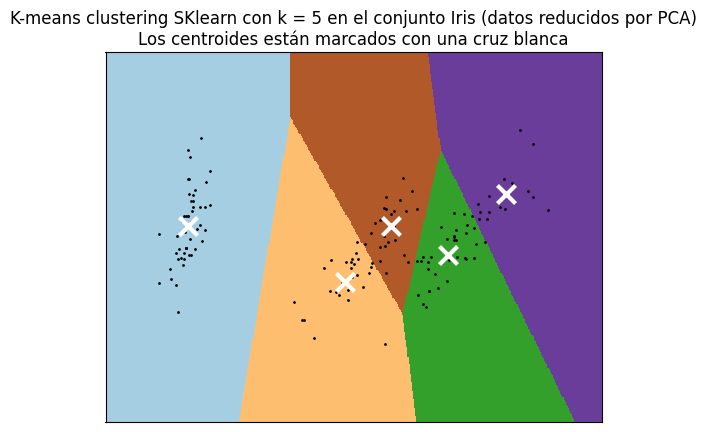

In [10]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

k_values =[2,3,4,5]

for k in k_values:
    reduced_data = PCA(n_components=2).fit_transform(iris_data)
    kmeans = KMeans(init="k-means++", n_clusters=k)
    kmeans.fit(reduced_data)
    
    h = 0.02 
    
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        f"K-means clustering SKlearn con k = {k} en el conjunto Iris (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

    if k == 3:
        disp = ConfusionMatrixDisplay.from_predictions(iris_data['Class'], kmeans.labels_)
        disp.plot()


# TEXTO IMPORTANTE

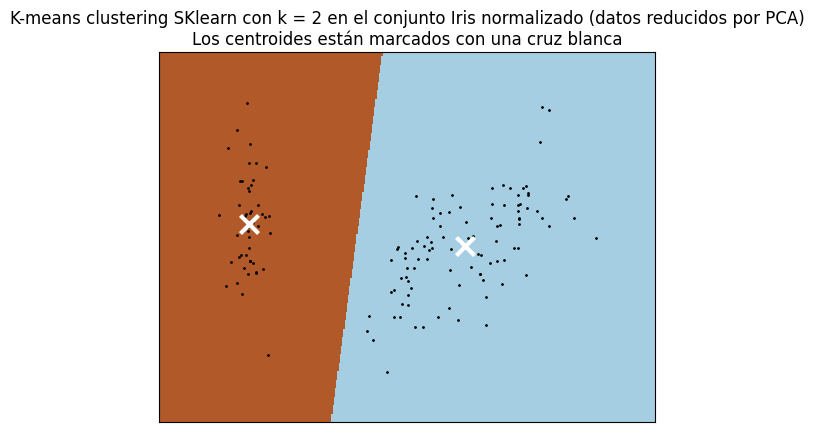

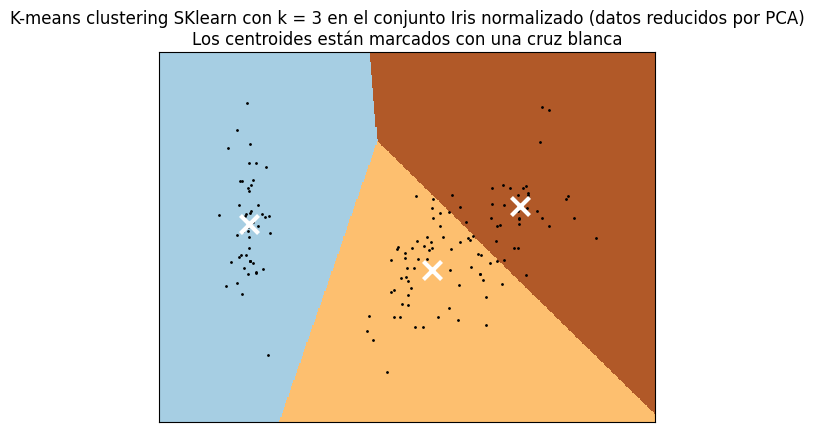

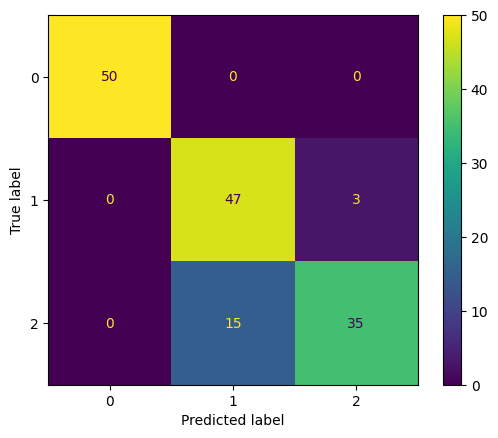

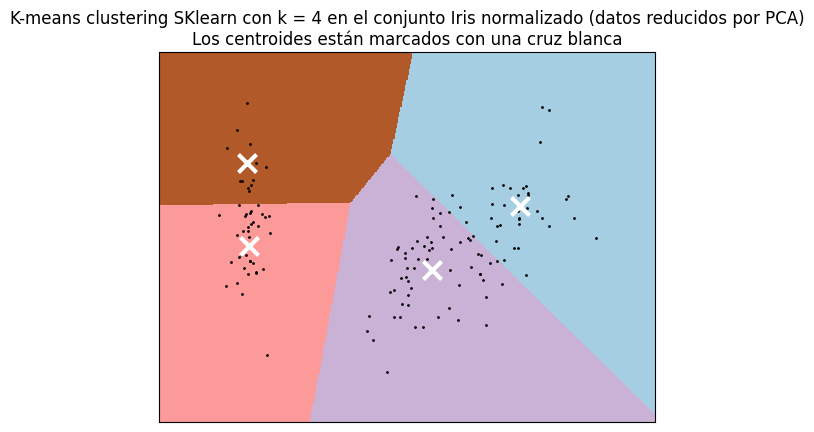

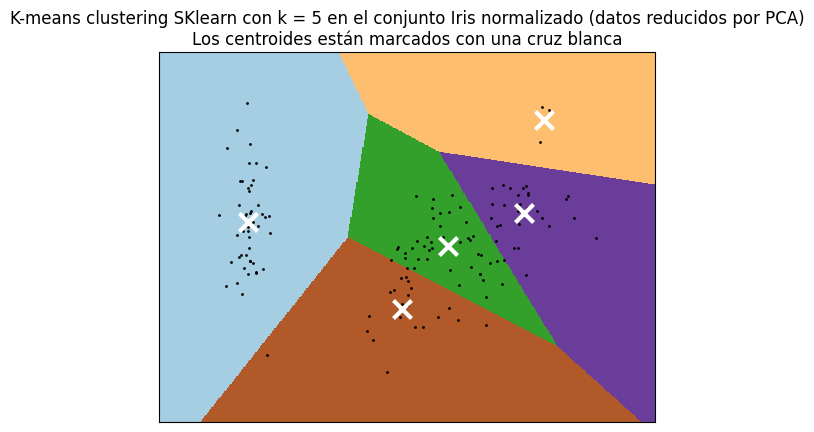

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

k_values =[2,3,4,5]

for k in k_values:
    reduced_data = PCA(n_components=2).fit_transform(iris_data_norm)
    kmeans = KMeans(init="k-means++", n_clusters=k)
    kmeans.fit(reduced_data)
    
    h = 0.02 
    
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        f"K-means clustering SKlearn con k = {k} en el conjunto Iris normalizado (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

    if k == 3:
        disp = ConfusionMatrixDisplay.from_predictions(iris_data_norm['Class'], kmeans.labels_)
        disp.plot()


# TEXTO IMPORTANTE